In [1]:
import matplotlib
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from bisect import bisect
from PreFRBLE.plot import *
#from Convenience import *

## Inergalactic Medium
The prediction for the intergalactic medium is produced using a single cosmological magnetohydrodynamical simulation with adaptive mesh refinement, that reproduces the local Universe within 125 Mpc/h distance to Earth and allows to obtain reasonable results up to redshift 6. (For more information about this model, see Hackstein et al. 2018, 2019 and 2020 as well as Vazza et al. 2017 for the physics involved)
In order to test other models for the intergalactic magnetic field (IGMF), we renormalize the magnetic field based on the local overdensity, according to the ratio of the $|B|\sim \rho$ relation.
We parametrize this largely unknown relation by a simple power law
$$
|B| \propto \rho^\alpha
$$
in order to provide idealized constraints applicable to any model of the IGMF.

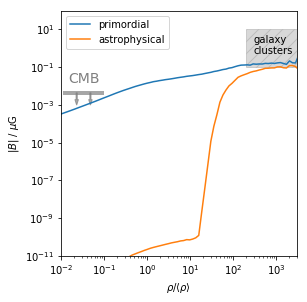

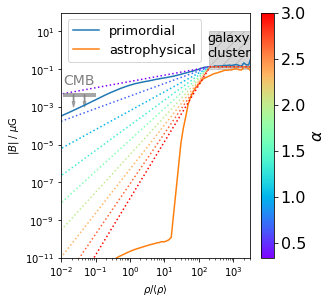

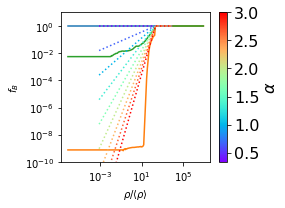

In [32]:
#fig, axs = plt.subplots(1,2,figsize=(8,3))

fig, ax = plt.subplots(1,1,figsize=(4,4))
plt.tight_layout()


fig, ax1 = plt.subplots(1,1,figsize=(4,4))
plt.tight_layout()

fig, ax2 = plt.subplots(1,1,figsize=(4,3))
axs=[ax1,ax2]

root = '/hummel/MHD-models/clues/'
filename_relation = root+'2018/'+"B_renorm_alpha%i-3rd.txt"

primordial = np.genfromtxt( root + 'rho2B_primordial_median.txt', names=True )
rho = primordial['density']
B = primordial['B']*1e10
axs[0].loglog(rho, B, label='primordial')
ax.loglog(rho, B, label='primordial')

astrophysical = np.genfromtxt( root + 'rho2B_astrophysical_median.txt', names=True )
rho_ = astrophysical['density']
B_ = astrophysical['B']*1e11
axs[0].loglog(rho_, B_, label='astrophysical')
ax.loglog(rho_, B_, label='astrophysical')

'''
astrophysical = np.genfromtxt( root + 'rho2B_astrophysical_mean.txt', names=True )
rho_ = astrophysical['density']
B__ = astrophysical['B']*1e11
axs[0].loglog(rho_, B__, label='astrophysical_mean')
'''

primordial = np.genfromtxt( root + '2018/B_renorm_primordial.txt', names=True )
rho_ = primordial['density']
f = primordial['Renorm']
axs[1].plot(rho_, f)

astrophysical = np.genfromtxt( root + '2018/B_renorm_astrophysical_median.txt', names=True )
rho_ = astrophysical['density']
f = astrophysical['Renorm']
axs[1].plot(rho_, f)

astrophysical = np.genfromtxt( root + '2018/B_renorm_astrophysical_mean.txt', names=True )
rho_ = astrophysical['density']
f = astrophysical['Renorm']
axs[1].plot(rho_, f)


# density, above which B is known, i. e. is the same throughout all scenarios
rho0 = 2e2
i_0 = bisect(rho, rho0)
rho_0 = rho[i_0]
B_0 = B[i_0]


alphas = np.arange(1,10).astype('float') / 3
colors = rainbow( np.linspace(0,1,len(alphas)) )
for alpha, color in zip(alphas,colors):
    ## find B_0, such that B matches with known value at rho0
    B0 = B_0/rho_0**alpha
    B_ = rho**alpha * B0
    B_[i_0:] = B_0
    if alpha == alphas[0]:
        B = B_
    ## B renormalization factor
    renorm = B_/B
    axs[0].loglog(rho, B_, linestyle=':', color=color ) #, label=r"$\alpha$ = %.0f/3" % (alpha*3) )
    axs[1].loglog(rho, B_/B, linestyle=':', color=color )# , label=r"$\alpha$ = %.1f" % alpha)
    if True:
        with open( filename_relation % int(alpha*3), 'w' ) as f:
            f.write( "%s\t\t%s\n" % ( "density", "Renorm" ) )
            for d, r in zip( rho, renorm ):
                f.write( "%e\t%e\n" % ( d, r ) )
            f.write( "%e\t%e\n" % ( rho[-1], 1 ) )


ax.set_xlim(1e-2,3e3)
ax.set_ylim(1e-11,100)
axs[0].set_xlim(1e-2,3e3)
axs[0].set_ylim(1e-11,100)
axs[1].set_ylim(1e-10,10)
ax.set_xlabel(r"$\rho/\langle\rho\rangle$")
axs[0].set_xlabel(r"$\rho/\langle\rho\rangle$")
axs[1].set_xlabel(r"$\rho/\langle\rho\rangle$")
ax.set_ylabel(r"$|B|$ / $\mu$G")
axs[0].set_ylabel(r"$|B|$ / $\mu$G")
axs[1].set_ylabel(r"$f_B$")


ax.fill([2e2,2e2,1e4,1e4],[1e-1,10,10,1e-1], hatch='//', facecolor='none', alpha=0.3, color='gray')
ax.text(3e2, 0.5, 'galaxy\nclusters')
PlotLimit( ax=ax, x=[1.1e-2,1e-1], y=[4.4e-3,4.4e-3], label='CMB', shift_text_vertical=0.02, lower_limit=False, arrow_length=0.05 )
PlotLimit( ax=axs[0], x=[1.1e-2,1e-1], y=[4.4e-3,4.4e-3], label='CMB', shift_text_vertical=0.02, lower_limit=False, arrow_length=0.05 )

axs[0].fill([2e2,2e2,1e4,1e4],[1e-1,10,10,1e-1], hatch='//', facecolor='none', alpha=0.3, color='gray')
#axs[0].text(1.8e2, 2e-3, 'galaxy\ncluster', fontsize=13, fontdict={'fontname':'Verdana'})
axs[0].text(1.8e2, 5e-1, 'galaxy\ncluster', fontsize=13, fontdict={'fontname':'Verdana'})

Colorbar( x=alphas, label=r"$\alpha$", ax=axs[0] )
Colorbar( x=alphas, label=r"$\alpha$", ax=axs[1] )

ax.legend()
axs[0].legend(fontsize=13)

#axs[1].legend()



plt.fill()
plt.tight_layout()
AllSidesTicks(axs[0])

plt.show()

Here we show the $|B|\sim \rho$ relation of IGMF models to be investigated as well as the renormalization factors as function of overdensity.

Here we investigate which regions in the IGM, in terms of over-density, do significantly contribute to observed $\langle\text{RM}\rangle$

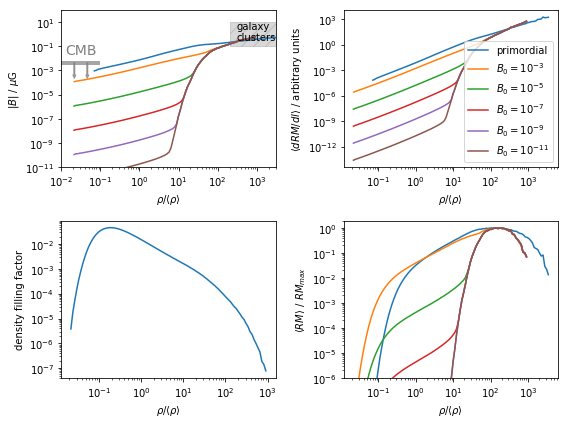

In [15]:
root_test = '/juwels/rho_B_relation/'

fig, axs = plt.subplots(2,2,figsize=(8,6))

## first, read and plot density filling factor
rho_ff = np.load('/juwels/rho_B_relation/B9b_rho_ff.npy')
axs[1][0].loglog( rho_ff[1], rho_ff[0])


data = np.genfromtxt( root_test + 'rho2B_primordial.txt', names=True )
rho = data['density'][:-1]
#    rho = rho[:1] + np.diff(rho)/2
B = data['B'][:-1]
axs[0][0].loglog(rho, B, label=r"primordial")
dRM = B*rho
axs[0][1].loglog(rho, dRM, label='primordial')
RM = dRM*rho_ff[0]
axs[1][1].loglog(rho, RM/np.max(RM), label='primordial')


for B0 in [9,11,13,15,17]:
    data = np.genfromtxt( root_test + 'rho2B_B%ib.txt' % B0, names=True )
    rho = data['density'][:-1]
#    rho = rho[:1] + np.diff(rho)/2
    B = data['B'][:-1]
    label = r"$B_0 = 10^{-%i}$" % (B0-6)
    axs[0][0].loglog(rho, B, label=label )
    dRM = B*rho
    axs[0][1].loglog(rho, dRM, label=label)
    RM = dRM*rho_ff[0]
    axs[1][1].loglog(rho, RM/np.max(RM), label=label )


axs[0][0].set_xlim(1e-2,3e3)
axs[0][0].set_ylim(1e-11,100)
#axs[1].set_ylim(1e-10,10)
axs[1][1].set_ylim(1e-6,2)
axs[0][0].set_xlabel(r"$\rho/\langle\rho\rangle$")
axs[0][1].set_xlabel(r"$\rho/\langle\rho\rangle$")
axs[1][0].set_xlabel(r"$\rho/\langle\rho\rangle$")
axs[1][1].set_xlabel(r"$\rho/\langle\rho\rangle$")
axs[0][0].set_ylabel(r"$|B|$ / $\mu$G")
axs[0][1].set_ylabel(r"$\langle dRM/dl\rangle$ / arbitrary units")
axs[1][0].set_ylabel(r"density filling factor")
axs[1][1].set_ylabel(r"$\langle RM\rangle$ / $RM_{max}$")

axs[0][1].legend( loc='lower right')
#axs[1].legend()


PlotLimit( axs[0][0], [1.01e-2,1e-1], [4.4e-3,4.4e-3], label='CMB', lower_limit=False, shift_text_vertical=0.04)    

axs[0][0].fill([2e2,2e2,1e4,1e4],[1e-1,10,10,1e-1], hatch='//', facecolor='none', alpha=0.3, color='gray')
axs[0][0].text(3e2, 0.3, 'galaxy\nclusters')


plt.tight_layout()


The upper left plot shows the average magnetic field strength as function of over-density for a number of MHD models with identical dynamo physics, starting with different strengths of the primordial magnetic field $B_0$.

To estimate the average contribution to RM per unit length, we multiply $|B|$ and $\rho$ in the upper right plot.


To finally obtain the average contribution from regions of different over-density, we multiply this result by the model independent volume filling factor of overdensities, shown in the lower left. 

The result is in the lower right plot. Some of the models are not visible in that plot. They all coincide with the brown graph, since the y-axis only shows the relevant contribution to RM. Models that are identical in this plot cannot be distinguished by observation of FRBs.

Evidently, even for the strongest intergalactic magnetic field allowed by PLANCK limits, contributions from below over-densities of 1 are negligible. However, the details of $|B| \sim \rho$ between $10 < \rho/\langle\rho\rangle < 200$ can induce significant changes in RM that can be used to constrain models for the origin and formation of IGMFs.